In [4]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from typing import List

#latitude en radians du point geographique
def latitude(point : Tuple[int,int]) -> int:
    latitude = point[0]
    return (latitude/180) * np.pi

#longitude en radians du point geographique
def longitude(point : Tuple[int,int]) -> int:
    longitude = point[1]
    return (longitude/180) * np.pi

# distance entre 2 points geographiques sur une sphere de rayon R
def distance(point_1 : Tuple[int,int], point_2 : Tuple[int,int], R : int) -> int:
    return 2 * R * np.arcsin(np.sqrt((np.sin((latitude(point_1)-latitude(point_2))/2))**2 + np.cos(latitude(point_1)) 
                                     * np.cos(latitude(point_2)) * np.sin((longitude(point_1)-longitude(point_2))/2)**2))

#distance spatiale entre 2 points
def distance_spatial (point_1 : Tuple[int,int,int], point_2 : Tuple[int,int,int]) -> int:
    return np.sqrt((point_1[0] - point_2[0])**2 + (point_1[1] - point_2[1])**2 + (point_1[2] - point_2[2])**2)

# angle entre 2 points geographiques sur une sphere de rayon R
def angle(point_1 : Tuple[int,int], point_2 : Tuple[int,int]) -> int:
    theta_1 = longitude(point_1)
    phi_1 = latitude(point_1)
    theta_2 = longitude(point_2)
    phi_2 = latitude(point_2)
    return np.arccos( np.cos(theta_1) * np.cos(phi_1) * np.cos(theta_2) * np.cos(phi_2) + np.sin(theta_1) * np.cos (phi_1) 
                     * np.sin(theta_2) * np.cos (phi_2) + np.sin(phi_1) * np.sin (phi_2))
                   
# convertir coordonnées geographiques en coordonnées cartesiennes
def convertir_geo_v_cart (point_1 : Tuple[int,int], rayon) -> Tuple[int,int]:
    x = np.cos(longitude(point_1)) * np.cos(latitude(point_1)) * rayon
    y = np.sin(longitude(point_1)) * np.cos(latitude(point_1)) * rayon
    z = np.sin(latitude(point_1)) * rayon
    return (x,y,z)
                                                                    
# convertir coordonnées cartesiennes en coordonnées geographiques
def convertir_cart_v_geo (point : Tuple[int,int,int]) -> Tuple[int,int]:
    x = point[0]
    y = point[1]
    z = point[2]
    rayon = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arcsin(z/rayon)
    latitude = - theta * (180 / np.pi)
    phi = 0
    if x == 0 and y > 0 :
        phi = np.pi / 2
    elif x == 0 and y < 0 :
        phi = - np.pi / 2
    elif y == 0 and x > 0 :
        phi = 0
    elif y == 0 and x < 0 :
        phi = - np.pi
    elif y == 0 and x == 0 :
        phi = 0
    elif x > 0 and y > 0 :
        phi = np.arctan(y/x)
    elif x > 0 and y < 0 :
        phi = np.arctan(y/x)
    elif x < 0 and y > 0 :
        phi = np.arctan(y/x) + np.pi
    elif x < 0 and y < 0 :
        phi = np.arctan(y/x) - np.pi
    longitude = phi * (180 / np.pi)
    return (latitude,longitude)
                                                                    
# pour une liste de points geographiques, afficher ces points dans une sphere
def afficher_sphere(data : List[Tuple[int,int]]):
    rayon = 1
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0 * pi:100j]
    x = rayon * sin(phi) * cos(theta)
    y = rayon * sin(phi) * sin(theta)
    z = rayon * cos(phi)
                                                                    
    #Import data points
    xx = [convertir_geo_v_cart(points,rayon)[0] for points in data]
    yy = [convertir_geo_v_cart(points,rayon)[1] for points in data]
    zz = [convertir_geo_v_cart(points,rayon)[2] for points in data]
                                                                    
    #Set colours and render
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, rstride=1, cstride=1, color='c', alpha=0.6, linewidth=0)
    ax.plot(xx,yy,zz,linestyle='solid', marker='D')
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
                                                                    

def calcul_distances_mins(data : List[int]):
    R = 1
    liste_distances : List[Tuple[int]] = []
    for point1 in data:
        distance_max = R * 2 * np.pi
        for point2 in data:
            if (distance(point1,point2,R) < distance_max and distance(point1,point2,R) > 0):
                distance_max = distance(point1,point2,R)
        liste_distances.append((distance_max))
    return liste_distances
                                                                  

def calclul_angles_mins(data : List[int]):
    liste_angles : List[int] = []
    i = 0
    for point1 in data:
        angle_max = 2* np.pi
        for point2 in data:
            if (angle(point1,point2) < angle_max and angle(point1,point2) > 0):
                angle_max = angle(point1,point2)
        liste_angles.append((angle_max))
    return liste_angles
                
# calcul aire secteur spherique
def calcul_aire_secteur_spherique (angle : int, rayon : int):
    h = rayon * (1 - np.cos(angle))
    return 2 * np.pi * rayon * h
                
def calcul_somme_aire_secteur_spherique(liste_angles : List[int], rayon : int):
    aire_totale = 0
    for point in liste_angles:
        angle = point / 2
        aire_totale = aire_totale + calcul_aire_secteur_spherique(angle,rayon)
    return aire_totale
                                                                  
def calcul_aire_sphere(rayon : int):
    return 4 * np.pi * rayon**2
                                                                  
def calculer_taux_de_couverture(data) -> int:
    aire_secteurs = calcul_somme_aire_secteur_spherique(calclul_angles_mins(data),1)
    aire_sphere = calcul_aire_sphere(1)
    return aire_secteurs/aire_sphere
                
def calculer_ecart_type_distances(data) -> int:
    return np.std(calcul_distances_mins(data))
def calculer_moyenne_distances(data) -> int:
    return np.mean(calcul_distances_mins(data))
                
#affichage des resultats
def afficher_resultats(data):
    print('distance au plus proche voisin exprimée pour chaque point : ')
    print(calcul_distances_mins(data))
    print ('moyenne de la distance au plus proche voisin : ')
    print(calculer_moyenne_distances(data))
    print ('ecart type de la distance au plus proche voisin : ')
    print (calculer_ecart_type_distances(data))
    print ('taux de couverture : ')
    print(calculer_taux_de_couverture(data))
    return None
                
#afficher les coordonnées cartesiennes
def afficher_coordonnees_cart(data):
    liste_coord_cart : List[int,int,int] = []
    for i in data:
        liste_coord_cart.append(convertir_geo_v_cart(i,1))
    return liste_coord_cart                                          

distance au plus proche voisin exprimée pour chaque point : 
[3.141592653589793, 3.141592653589793]
moyenne de la distance au plus proche voisin : 
3.141592653589793
ecart type de la distance au plus proche voisin : 
0.0
taux de couverture : 
0.9999999999999999
distance spatial
2.0


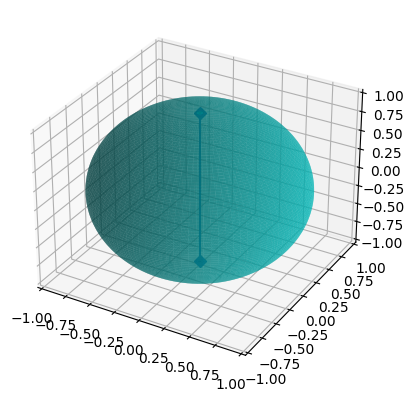

In [5]:
# 2 points
point_A = (90,0)
point_B = (-90,0)

#data pour le dessin 3D
data = [point_A,point_B]
afficher_sphere(data)

#data pour les calculs
data = [point_A,point_B]
afficher_resultats(data)
plt.savefig("2_points.png")

#distance spatial
print('distance spatial')
print(distance_spatial(convertir_geo_v_cart(point_A,1),convertir_geo_v_cart(point_B,1)))

distance au plus proche voisin exprimée pour chaque point : 
[2.0943951023931953, 2.0943951023931953, 2.0943951023931953]
moyenne de la distance au plus proche voisin : 
2.0943951023931953
ecart type de la distance au plus proche voisin : 
0.0
taux de couverture : 
0.24999999999999992
distance spatial
1.7320508075688772


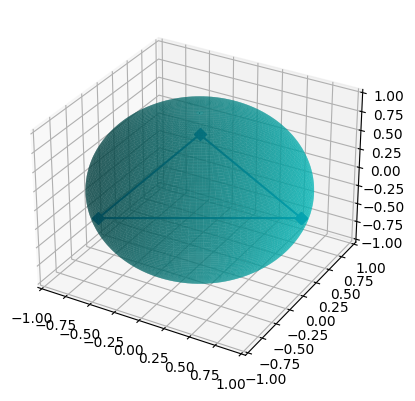

In [8]:
#3 points

#coordonnées geographiques
point_A = (0,0)
point_B = (0,120)
point_C = (0,-120)

#data pour le dessin 3D
data = [point_A,point_B,point_C,point_A]
afficher_sphere(data)

#data pour les calculs
data = [point_A,point_B,point_C]
afficher_resultats(data)
plt.savefig("3_points.png")

#distance spatial
print('distance spatial')
print(distance_spatial(convertir_geo_v_cart(point_A,1),convertir_geo_v_cart(point_C,1)))

distance au plus proche voisin exprimée pour chaque point : 
[1.911135530933791, 1.9101306740706097, 1.9101306740706097, 1.9101306740706097]
moyenne de la distance au plus proche voisin : 
1.910381888286405
ecart type de la distance au plus proche voisin : 
0.000435115785341076
taux de couverture : 
0.4226496944263457
distance spatial
1.6332831103233578


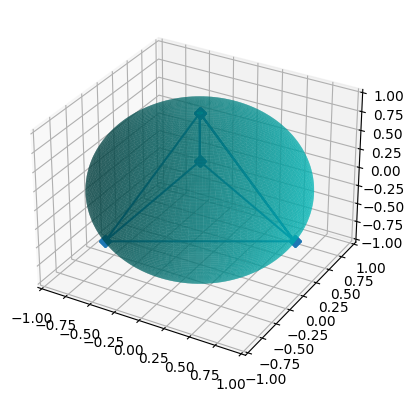

In [9]:
#4 points

X = -19.5 # valeur approchée par dichotomie

#coordonnées geographiques
point_A = (90,0)
point_B = (X,0)
point_C = (X,120)
point_D = (X,-120)

#data pour le dessin 3D
data = [point_A,point_B,
        point_A,point_C,
        point_A,point_D,
        point_C,point_B,point_D]

#data pour les calculs
afficher_sphere(data)
data = [point_A,point_B,point_C,point_D]
afficher_resultats(data)
plt.savefig("4_points.png")

#distance spatial
print('distance spatial')
print(distance_spatial(convertir_geo_v_cart(point_A,1),convertir_geo_v_cart(point_D,1)))

distance au plus proche voisin exprimée pour chaque point : 
[1.5707963267948963, 1.5707963267948963, 1.5707963267948963, 1.5707963267948963, 1.5707963267948963, 1.5707963267948963]
moyenne de la distance au plus proche voisin : 
1.5707963267948963
ecart type de la distance au plus proche voisin : 
0.0
taux de couverture : 
0.8786796564403573
distance spatial
2.0


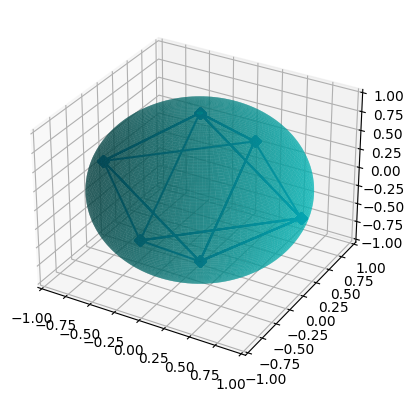

In [11]:
#6 points octoedre

#coordonnées geographiques
point_A = (90,0)
point_B = (0,0)
point_C = (0,90)
point_D = (0,180)
point_E = (0,-90)
point_F = (-90,0)

#data pour le dessin 3D
data = [point_A,point_B,
        point_A,point_C,
        point_A,point_D,
        point_A,point_E,
        point_B,point_C,point_D,point_E,point_B, #plan equateur
        point_F,point_B,
        point_F,point_C,
        point_F,point_D,
        point_F,point_E]

#data pour les calculs
afficher_sphere(data)
data = [point_A,point_B,point_C,point_D,point_E,point_F]
afficher_resultats(data)
plt.savefig("6_points.png")

#distance spatial
print('distance spatial')
print(distance_spatial(convertir_geo_v_cart(point_A,1),convertir_geo_v_cart(point_F,1)))

distance au plus proche voisin exprimée pour chaque point : 
[1.2309594173407743, 1.2309594173407743, 1.2309594173407743, 1.2309594173407743, 1.2309594173407743, 1.2309594173407743, 1.2309594173407743, 1.2309594173407743]
moyenne de la distance au plus proche voisin : 
1.2309594173407743
ecart type de la distance au plus proche voisin : 
0.0
taux de couverture : 
0.7340136762890956
distance spatial
1.632993161855452


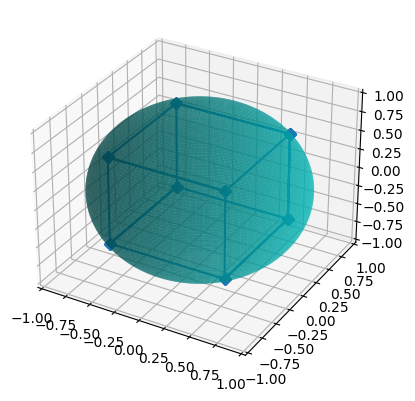

In [12]:
#8 points cube

#coordonnes cartesiennes
point_A = convertir_cart_v_geo((1,1,1))
point_B = convertir_cart_v_geo((1,-1,1))
point_C = convertir_cart_v_geo((-1,-1,1))
point_D = convertir_cart_v_geo((-1,1,1))
point_E = convertir_cart_v_geo((1,1,-1))
point_F = convertir_cart_v_geo((1,-1,-1))
point_G = convertir_cart_v_geo((-1,-1,-1))
point_H = convertir_cart_v_geo((-1,1,-1))

#data pour le dessin 3D
data = [point_A,point_B,point_C,point_D,point_A,
        point_E,point_F,point_G,point_H,point_E,
        # aretes latérales
        point_E,point_A,
        point_B,point_F,
        point_G,point_C,
        point_D,point_H,
        point_E,point_A]

#data pour les calculs
afficher_sphere(data)
data = [point_A,point_B,point_C,point_D,point_E,point_F,point_G,point_H]
afficher_resultats(data)
plt.savefig("8_points_cube.png")

#distance spatial
print('distance spatial')
print(distance_spatial(convertir_geo_v_cart(point_A,1),convertir_geo_v_cart(point_H,1)))

distance au plus proche voisin exprimée pour chaque point : 
[1.306527161717437, 1.306527161717437, 1.306527161717437, 1.306527161717437, 1.306527161717437, 1.306527161717437, 1.306527161717437, 1.306527161717437]
moyenne de la distance au plus proche voisin : 
1.306527161717437
ecart type de la distance au plus proche voisin : 
0.0
taux de couverture : 
0.8235820489567289
distance spatial
1.2155625241313248


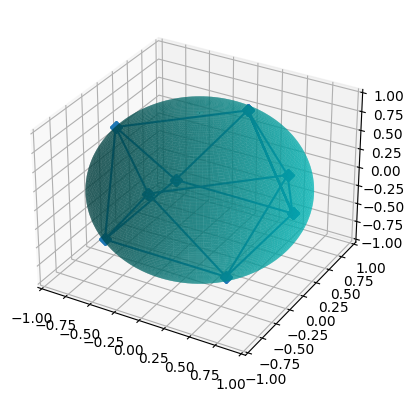

In [13]:
#8 points antiprisme carré

#hauteur de l'antiprisme
hauteur = 2 * 0.5 * np.sqrt(3 - np.tan(np.pi/8)**2)

# coordonnées cartésiennes
point_A = convertir_cart_v_geo((1,1,hauteur/2))
point_B = convertir_cart_v_geo((-1,1,hauteur/2))
point_C = convertir_cart_v_geo((-1,-1,hauteur/2))
point_D = convertir_cart_v_geo((1,-1,hauteur/2))
point_E = convertir_cart_v_geo((0,+np.sqrt(2),-hauteur/2))
point_F = convertir_cart_v_geo((-np.sqrt(2),0,-hauteur/2))
point_G = convertir_cart_v_geo((0,-np.sqrt(2),-hauteur/2))
point_H = convertir_cart_v_geo((+np.sqrt(2),0,-hauteur/2))

#data pour le dessin 3D
data = [point_A,point_B,point_C,point_D,point_A,
        point_E,point_F,point_G,point_H,point_E,
        # aretes latérales
        point_A,point_E,
        point_B,point_F,
        point_C,point_G,
        point_D,point_H,
        point_A]

#data pour les calculs
afficher_sphere(data)
data = [point_A,point_B,point_C,point_D,point_E,point_F,point_G,point_H]
afficher_resultats(data)
plt.savefig("8_points_antiprisme.png")

#distance spatial
print('distance spatial')
print(distance_spatial(convertir_geo_v_cart(point_A,1),convertir_geo_v_cart(point_H,1)))

distance au plus proche voisin exprimée pour chaque point : 
[1.1071487177940904, 1.1071487177940904, 1.1071487177940904, 1.1071487177940904, 1.1071487177940902, 1.1071487177940902, 1.1071487177940902, 1.1071487177940902, 1.1071487177940904, 1.1071487177940904, 1.1071487177940904, 1.1071487177940904]
moyenne de la distance au plus proche voisin : 
1.1071487177940902
ecart type de la distance au plus proche voisin : 
1.8129866073473578e-16
taux de couverture : 
0.8960951498877601
distance spatial
1.7013016167040798


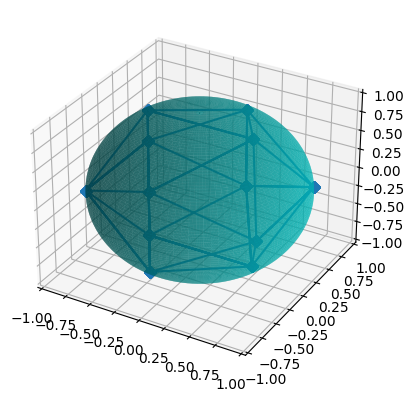

In [15]:
#12 points isocaedre

#nombre d'or nécessaire pour définir les coordonnées cartésiennes des points
phi = (1 + np.sqrt(5))/2 #nombre d'or

# coordonnées cartésiennes
#plan z=0
point_A = convertir_cart_v_geo((+phi,+1,0))
point_B = convertir_cart_v_geo((+phi,-1,0))
point_C = convertir_cart_v_geo((-phi,+1,0))
point_D = convertir_cart_v_geo((-phi,-1,0))
#plan y=0
point_E = convertir_cart_v_geo((+1,0,+phi))
point_F = convertir_cart_v_geo((-1,0,+phi))
point_G = convertir_cart_v_geo((1,0,-phi))
point_H = convertir_cart_v_geo((-1,0,-phi))
#plan x=0
point_I = convertir_cart_v_geo((0,+phi,1))
point_J = convertir_cart_v_geo((0,+phi,-1))
point_K = convertir_cart_v_geo((0,-phi,1))
point_L = convertir_cart_v_geo((0,-phi,-1))
#data pour le dessin 3D
data = [point_A,point_B,point_E,point_A,
        point_A,point_B,point_G,point_A,
        point_I,point_J,point_A,point_I,
        point_I,point_J,point_C,point_I,
        point_E,point_F,point_I,point_E,
        point_E,point_F,point_K,point_E,point_F,
        point_C,point_D,point_F,point_C,
        point_C,point_D,point_H,point_C,point_D,
        point_K,point_L,point_B,point_K,
        point_K,point_L,point_D,point_K,point_L,
        point_G,point_H,point_J,point_G,
        point_G,point_H,point_L,point_G]

#data pour les calculs
afficher_sphere(data)
data = [point_A,point_B,point_C,point_D,point_E,point_F,point_G,point_H,point_I,point_J,point_K,point_L]
afficher_resultats(data)
plt.savefig("20_points.png")
        
#distance spatial
print('distance spatial')
print(distance_spatial(convertir_geo_v_cart(point_A,1),convertir_geo_v_cart(point_L,1)))